In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


# EDA Process (Explotary Data Analysis)

In [4]:
df=pd.read_csv("obesity_data.csv")

In [5]:
# shows the first 5 rows of your dataset
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [6]:
# shows the last 5 rows of your dataset
df.tail()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight
999,66,Female,178.537130,74.962164,23.517168,1,Normal weight


In [7]:
# Total No of Rows and Column
df.shape

(1000, 7)

In [8]:
# Show all the column info like total rows how many null value are there and its dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [9]:
# finding missing values
df.isna().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [10]:
# finding duplicates values
df.duplicated().sum()

np.int64(0)

In [11]:
df["Gender"].value_counts()

Gender
Male      523
Female    477
Name: count, dtype: int64

In [12]:
# shows total Number of value of a column Data is balanced
df['ObesityCategory'].value_counts()

ObesityCategory
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64

In [13]:
# summary statistics of numerical column
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


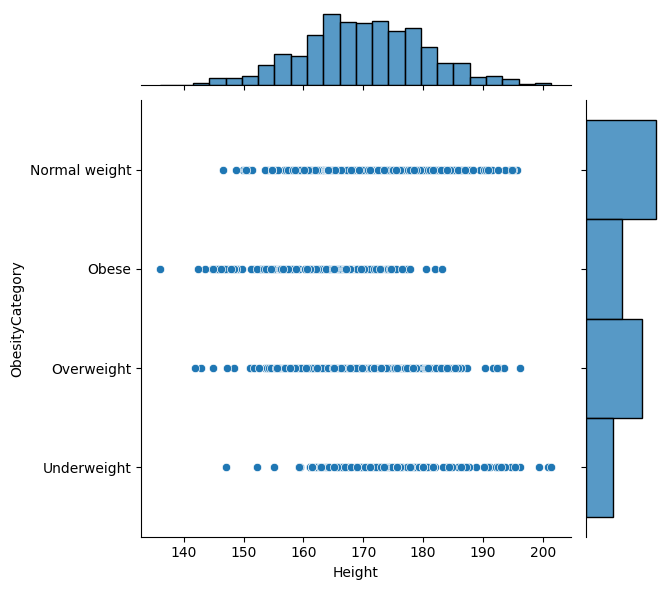

In [14]:
sns.jointplot(data=df,x="Height",y="ObesityCategory")

In [15]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
       'ObesityCategory'],
      dtype='object')

In [16]:
spread=['Age','Height', 'Weight', 'BMI']

In [17]:
df_corr=df.select_dtypes(include=['int64', 'float64']).corr()

In [18]:
df_corr

,Age,Height,Weight,BMI,PhysicalActivityLevel
Age,1.000000,0.019647,-0.061400,-0.059971,-0.022308
Height,0.019647,1.000000,0.016033,-0.477091,0.030380
Weight,-0.061400,0.016033,1.000000,0.861438,0.063406
BMI,-0.059971,-0.477091,0.861438,1.000000,0.038020
PhysicalActivityLevel,-0.022308,0.030380,0.063406,0.038020,1.000000


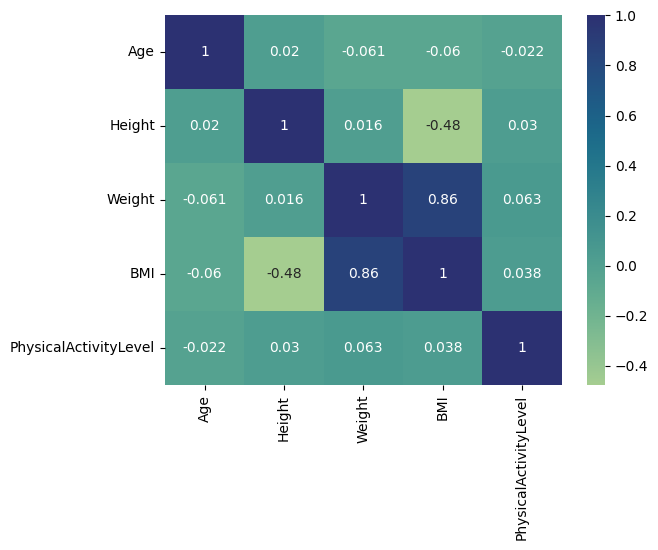

In [19]:
sns.heatmap(df_corr,annot=True,cmap="crest")
plt.show()

In [20]:
# There is a good relation between BMI and Weight as the BMI increase Weight will increase

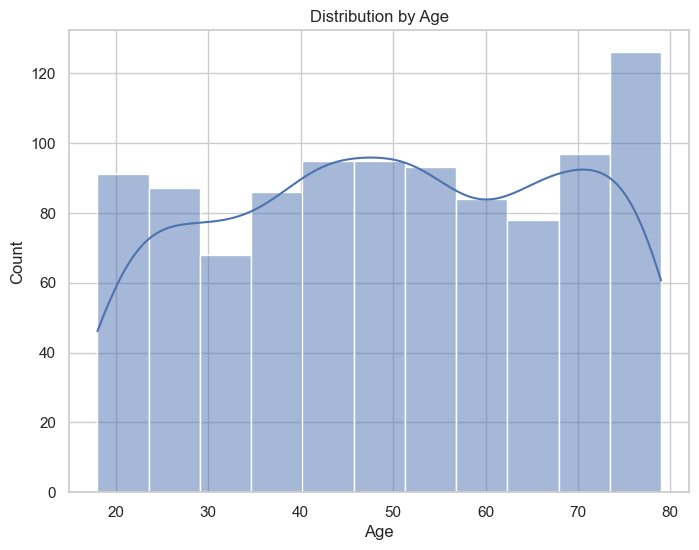

Axes(0.125,0.11;0.775x0.77)


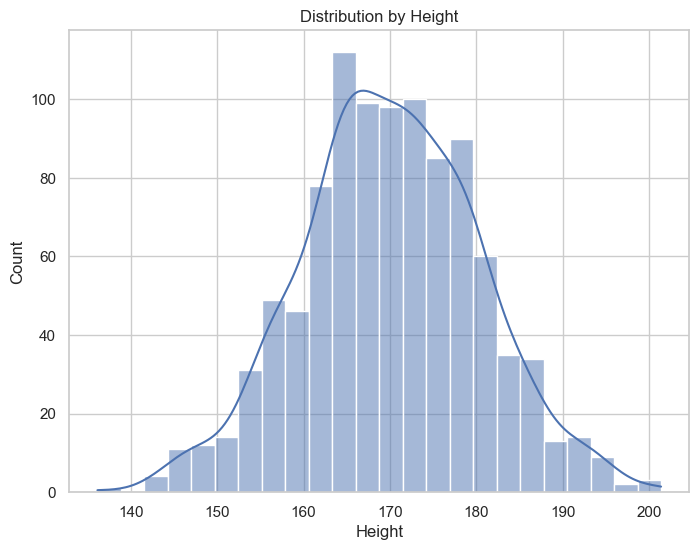

Axes(0.125,0.11;0.775x0.77)


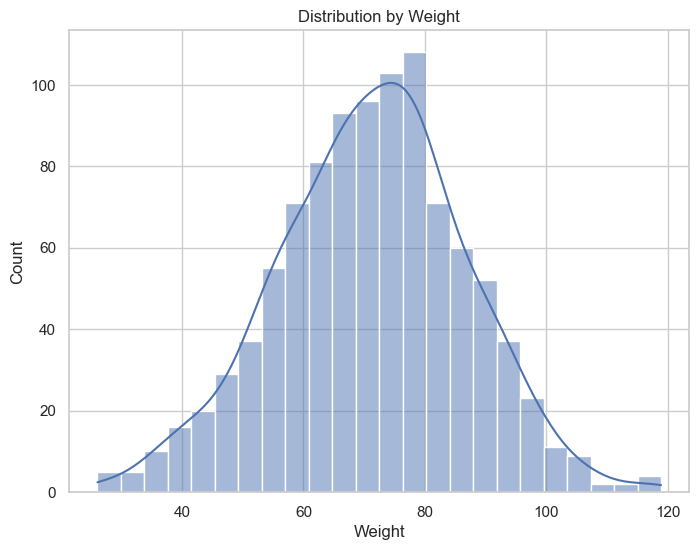

Axes(0.125,0.11;0.775x0.77)


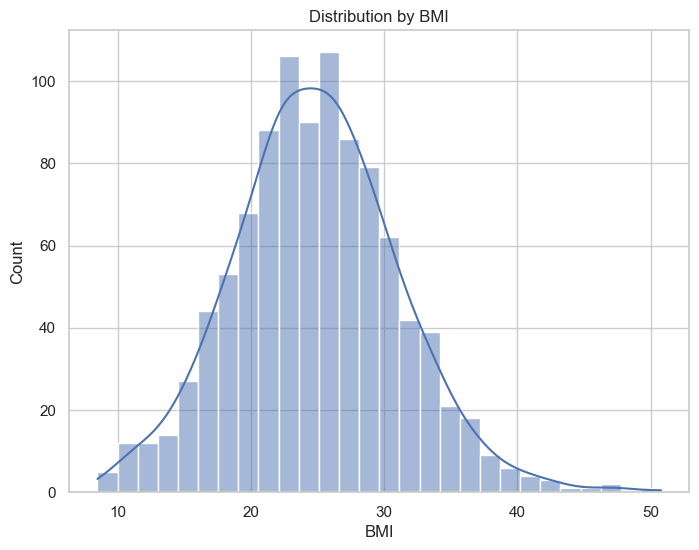

Axes(0.125,0.11;0.775x0.77)


In [21]:
for i in spread:
  sns.set(style="whitegrid")
  plt.figure(figsize=(8,6))
  hist=sns.histplot(data=df[i],kde=True)
  plt.title(f"Distribution by {i}")
  plt.xlabel(i)
  plt.show()
  print(hist)

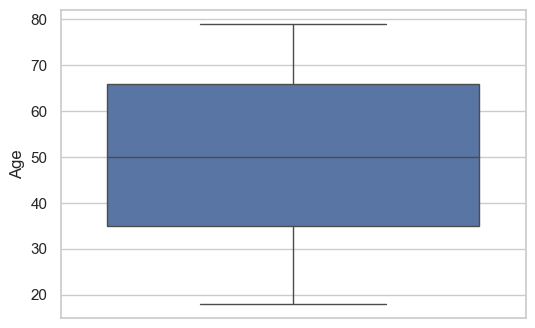

Axes(0.125,0.11;0.775x0.77)


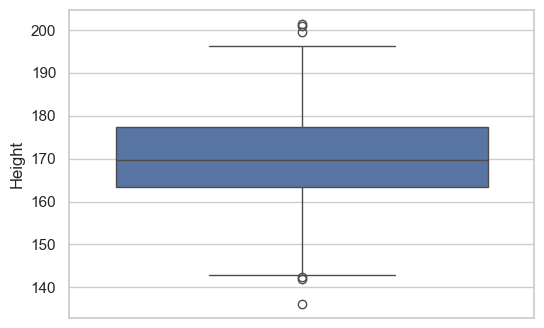

Axes(0.125,0.11;0.775x0.77)


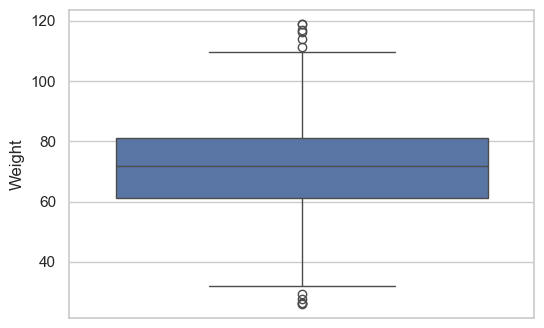

Axes(0.125,0.11;0.775x0.77)


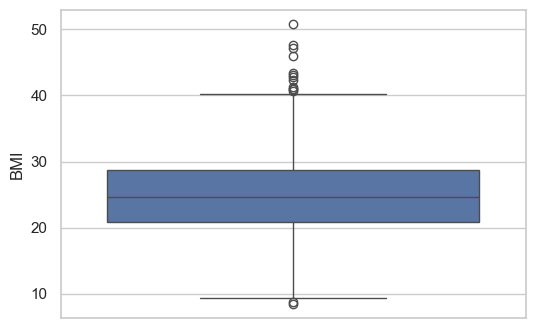

Axes(0.125,0.11;0.775x0.77)


In [22]:
for col in spread:
  sns.set(style="whitegrid")
  plt.figure(figsize=(6,4))
  outliers=sns.boxplot(df[col])
  plt.show()
  print(outliers)

C:\Users\Shibbu\AppData\Local\Temp\ipykernel_1048\3584030903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  Total=sns.countplot(df[i],palette='viridis',width=0.4)


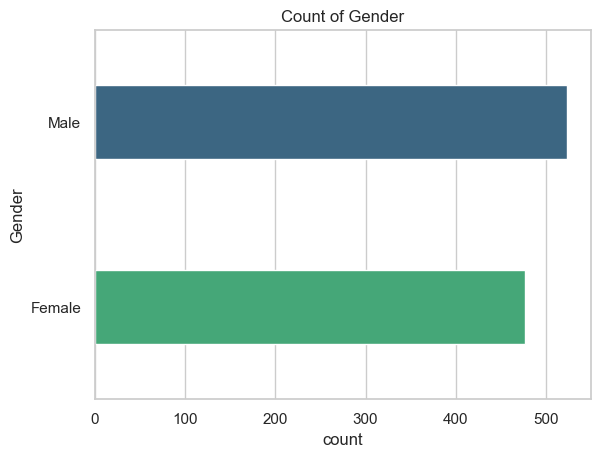

Axes(0.125,0.11;0.775x0.77)


C:\Users\Shibbu\AppData\Local\Temp\ipykernel_1048\3584030903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  Total=sns.countplot(df[i],palette='viridis',width=0.4)


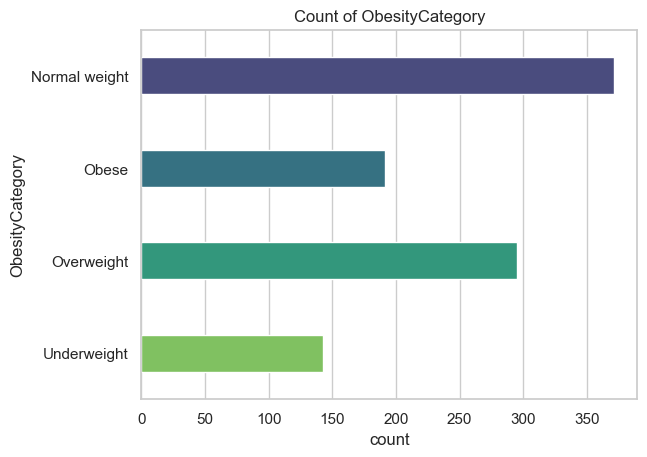

Axes(0.125,0.11;0.775x0.77)


In [23]:
count=['Gender','ObesityCategory']
for i in count:
  Total=sns.countplot(df[i],palette='viridis',width=0.4)
  plt.title(f"Count of {i}")
  plt.show()
  print(Total)

Text(0.5, 1.0, 'Total Obesity Category by gender')

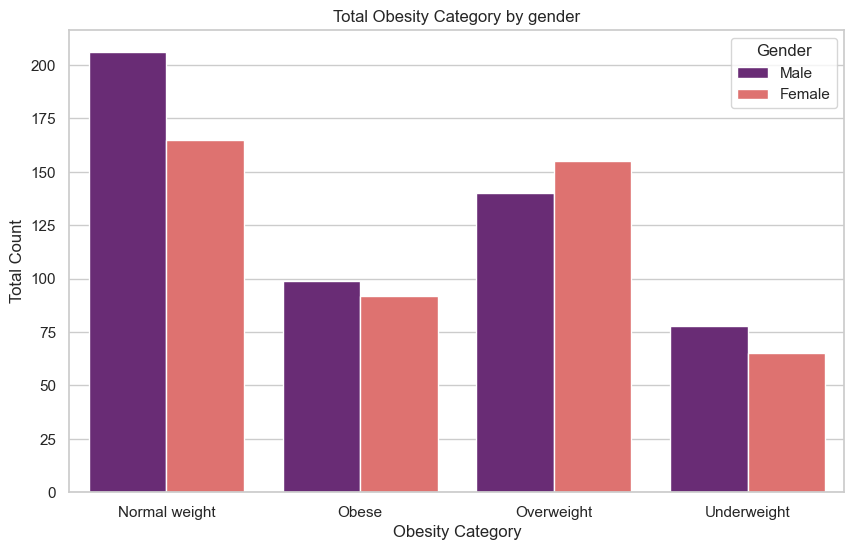

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,hue="Gender",x="ObesityCategory",palette="magma")
plt.xlabel("Obesity Category")
plt.ylabel("Total Count")
plt.title("Total Obesity Category by gender")

In [25]:
# By using Boxplot we had identify that we had oultiers in Height Weight and BMI
# To see the value of Outliers we need to use IQR
# No outliers in Age column

In [26]:
# Q1=df["Height"].quantile(0.25)
# Q3=df["Height"].quantile(0.75)

# IQR=Q3-Q1
# print(IQR)

# LL=Q1 - 1.5*  IQR
# UL=Q3 + 1.5 * IQR
# LL,UL

# df[(df.Height<LL) | (df.Height>UL)]

In [27]:
col=["Height","Weight","BMI"]
for name in col:
  Q1=df[name].quantile(0.25)
  Q3=df[name].quantile(0.75)
  print(f"{name} percentile")
  print(f"25th percentile is {Q1} 75th percentile is {Q3} ")
  IQR=Q3-Q1
  LL=Q1 - 1.5*  IQR
  UL=Q3 + 1.5 * IQR
  print(f"IQR of {name} {IQR}" )
  print(f"Range of Normal values {LL,UL}")
  print()

Outliers=(df[(df[name]<LL) | (df[name]>UL)])


Height percentile
25th percentile is 163.514204575 75th percentile is 177.35359565000002 
IQR of Height 13.839391075000009
Range of Normal values (np.float64(142.75511796249998), np.float64(198.11268226250002))

Weight percentile
25th percentile is 61.129628935 75th percentile is 81.13374577 
IQR of Weight 20.004116835000005
Range of Normal values (np.float64(31.123453682499992), np.float64(111.1399210225))

BMI percentile
25th percentile is 20.91806802 75th percentile is 28.732131907499998 
IQR of BMI 7.814063887499998
Range of Normal values (np.float64(9.196972188750003), np.float64(40.453227738749995))



In [28]:
# This data are outliers in our dataset
Outliers

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
22,19,Male,143.527471,83.796214,40.677507,2,Obese
37,66,Female,149.147824,95.299588,42.840761,4,Obese
134,26,Male,152.949133,118.819709,50.791898,2,Obese
263,49,Male,146.753207,91.255657,42.372549,2,Obese
311,22,Female,145.448750,99.868789,47.207369,2,Obese
368,79,Male,201.419670,34.365010,8.470572,1,Underweight
507,34,Female,145.314571,87.116991,41.255755,2,Obese
529,62,Male,136.115719,85.166147,45.967452,2,Obese
591,73,Male,157.617043,107.856997,43.415217,2,Obese
604,70,Female,145.682864,91.366930,43.049894,4,Obese


In [29]:
Total=len(Outliers)

In [30]:
print("Total Outliers in our dataset is ",Total)

Total Outliers in our dataset is  14


In [31]:
# we have identify 14 outliers in our dataset but as dataset is small so let try withour removing outliers how much accuracy will be
# with help of using  standarization scaling

In [32]:
df[["Gender","ObesityCategory"]]=df[["Gender","ObesityCategory"]].apply(LabelEncoder().fit_transform)

In [33]:
# Independent Variables in X and dependent in Y
X=df.drop(columns={"ObesityCategory"})
y=df["ObesityCategory"]

In [34]:
print(X) # 1 is Male and 0 is Female

     Age  Gender      Height     Weight        BMI  PhysicalActivityLevel
0     56       1  173.575262  71.982051  23.891783                      4
1     69       1  164.127306  89.959256  33.395209                      2
2     46       0  168.072202  72.930629  25.817737                      4
3     32       1  168.459633  84.886912  29.912247                      3
4     60       1  183.568568  69.038945  20.487903                      3
..   ...     ...         ...        ...        ...                    ...
995   18       1  155.588674  64.103182  26.480345                      4
996   35       0  165.076490  97.639771  35.830783                      1
997   49       0  156.570956  78.804284  32.146036                      1
998   64       1  164.192222  57.978115  21.505965                      4
999   66       0  178.537130  74.962164  23.517168                      1

[1000 rows x 6 columns]


In [35]:
print(y)
# 0 is Normal Weight, 1 is Obese, 2 is Over Weight, 3 is Under Weight

0      0
1      1
2      2
3      2
4      0
      ..
995    2
996    1
997    1
998    0
999    0
Name: ObesityCategory, Length: 1000, dtype: int64


In [36]:
y.value_counts() # data is divided into 37.1%,29.5%,19.1%,14.3% (i.e Normal Weight,Obese,Overweigt,Underweight)

ObesityCategory
0    371
2    295
1    191
3    143
Name: count, dtype: int64

In [37]:
y.nunique() #0,1,2,3

4

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=123)

print(f" Total Data of X is {X.shape}\n 80% for Training data {X_train.shape}\n 20% for Testing,{X_test.shape}")

 Total Data of X is (1000, 6)
 80% for Training data (800, 6)
 20% for Testing,(200, 6)


In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Model Building and Report

#### 1) Naive Bayes Algorithm

In [40]:
naivebayes=GaussianNB()
naivebayes.fit(X_train_scaled,y_train)

GaussianNB()

In [41]:
y_pred=naivebayes.predict(X_test_scaled)

In [42]:
y_pred

array([1, 3, 2, 1, 1, 2, 3, 0, 0, 3, 2, 1, 2, 1, 1, 0, 1, 2, 0, 3, 1, 0,
       2, 1, 0, 0, 0, 2, 3, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 3, 2, 0, 2, 3, 1, 0, 0, 0, 2, 0, 1, 2, 3, 3, 1, 2, 0, 0, 3, 3,
       2, 2, 0, 3, 1, 2, 3, 1, 1, 0, 3, 0, 3, 3, 0, 3, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 3, 2, 1, 0, 2, 2, 0, 2, 3, 2, 1, 0, 0, 2, 0, 2, 2, 1,
       1, 0, 0, 1, 2, 0, 2, 0, 3, 3, 1, 3, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0,
       3, 0, 1, 1, 2, 2, 0, 0, 3, 0, 3, 3, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0,
       3, 0, 0, 2, 0, 0, 3, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 2, 3, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2])

In [43]:
y_test

869    1
449    3
823    2
813    1
764    1
      ..
282    0
725    2
109    2
848    0
718    0
Name: ObesityCategory, Length: 200, dtype: int64

In [44]:
# Evaluation

In [45]:
accuracy_nb=accuracy_score(y_test,y_pred) # Testing Accuracy

In [46]:
print(accuracy_nb*100,"%")

95.0 %


In [47]:
cm=confusion_matrix(y_test,y_pred)

In [48]:
cm

array([[69,  0,  4,  1],
       [ 0, 37,  1,  0],
       [ 2,  1, 56,  0],
       [ 1,  0,  0, 28]])

Text(47.25, 0.5, 'True Value')

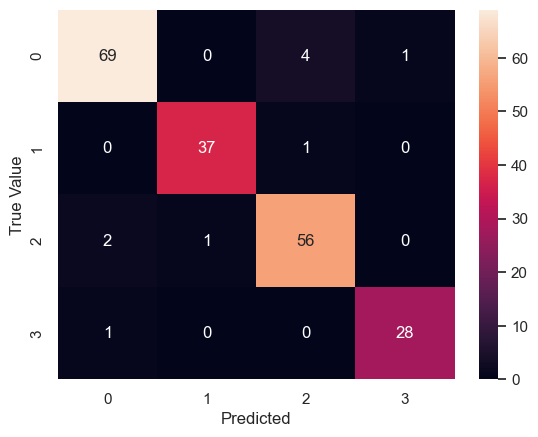

In [49]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Value")

In [50]:
Report_nb=classification_report(y_test,y_pred)
print(Report_nb)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        74
           1       0.97      0.97      0.97        38
           2       0.92      0.95      0.93        59
           3       0.97      0.97      0.97        29

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.95      0.95      0.95       200



In [51]:
print("Nave Bayes Algorithm:",accuracy_score(y_test,y_pred)*100,'%')

Nave Bayes Algorithm: 95.0 %


### 2) Support Vector Machine Classifier

In [52]:

svc=SVC(kernel='linear')
svc.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [53]:
y_pred_svc=svc.predict(X_test_scaled)

In [54]:
y_test

869    1
449    3
823    2
813    1
764    1
      ..
282    0
725    2
109    2
848    0
718    0
Name: ObesityCategory, Length: 200, dtype: int64

In [55]:
# Evaluation

In [56]:
svc.score(X_test_scaled,y_test)

0.975

In [57]:
accuracy_svc=accuracy_score(y_test,y_pred_svc)

In [58]:
print(accuracy_svc*100,"%")

97.5 %


In [59]:
cm_svc=confusion_matrix(y_pred_svc,y_test)

Text(47.25, 0.5, 'True Value')

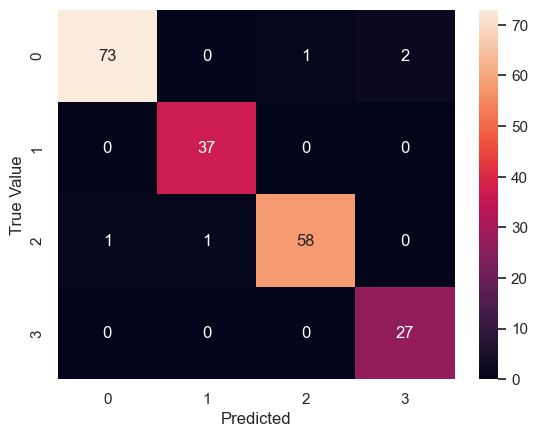

In [60]:
sns.heatmap(data=cm_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Value")

In [61]:
print("SVM :",accuracy_svc*100,'%')

SVM : 97.5 %


In [62]:
Report_svc=classification_report(y_test,y_pred_svc)
print(Report_svc)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       1.00      0.97      0.99        38
           2       0.97      0.98      0.97        59
           3       1.00      0.93      0.96        29

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



### 3) Decision Tree **Classifier**

In [63]:
# Post pronning
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier(max_depth=2,ccp_alpha=0.005)

In [64]:
# treemodel.fit(X_resampled,y_resampled)
treemodel.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.005, max_depth=2)

In [65]:
y_pred_treemodel=treemodel.predict(X_test)

In [66]:
y_pred_treemodel

array([1, 3, 2, 1, 1, 2, 3, 0, 0, 3, 2, 1, 2, 1, 2, 0, 1, 2, 0, 3, 1, 0,
       2, 1, 0, 0, 0, 2, 3, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 3, 2, 0, 2, 3, 1, 0, 0, 0, 2, 0, 1, 2, 3, 3, 1, 2, 0, 0, 3, 3,
       2, 2, 0, 3, 1, 2, 3, 1, 1, 0, 0, 0, 3, 3, 0, 3, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 3, 2, 1, 0, 2, 2, 0, 2, 3, 2, 1, 0, 0, 2, 0, 2, 2, 1,
       1, 0, 0, 1, 2, 0, 2, 2, 3, 3, 1, 3, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0,
       3, 0, 1, 1, 2, 2, 0, 0, 3, 0, 3, 3, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0,
       3, 0, 0, 2, 0, 0, 3, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 3, 0, 0, 3, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2,
       0, 0])

In [67]:
y_test

869    1
449    3
823    2
813    1
764    1
      ..
282    0
725    2
109    2
848    0
718    0
Name: ObesityCategory, Length: 200, dtype: int64

In [68]:
accuracy_treemodel=accuracy_score(y_test,y_pred_treemodel)

In [69]:
print(accuracy_treemodel*100,"%")

100.0 %


In [70]:
Report_treemodel=classification_report(y_test,y_pred_treemodel)

In [71]:
print(Report_treemodel)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        29

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Final Report

In [72]:
final_Report=pd.DataFrame({'Models':["Naive Bayes","Support Vector","Decission Tree"],
                         "accuracy_score":[accuracy_nb*100,accuracy_svc*100,accuracy_treemodel*100],
                         })

final_Report

,Models,accuracy_score
0,Naive Bayes,95.0
1,Support Vector,97.5
2,Decission Tree,100.0
